In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import sem, ttest_ind, linregress

In [2]:
#creating a path for the csv file
csv_file = "../Datasets/cumulative-co-emissions.csv"
gdp_file = "../Datasets/world-gdp-over-the-last-two-millennia.csv"

In [3]:
# reading the csv file and creating a dataframe
global_temp_CO2_df = pd.read_csv(csv_file)
global_temp_CO2_df.head()

,YR,CO2,land_ocean_temp_index,land_ocean_temp_index_smoothed
0,1880,5.596738e+10,-0.19,-0.11
1,1881,5.861068e+10,-0.10,-0.14
2,1882,6.139991e+10,-0.11,-0.18
3,1883,6.436377e+10,-0.19,-0.21
4,1884,6.736057e+10,-0.28,-0.24


In [4]:
del global_temp_CO2_df['land_ocean_temp_index']
global_temp_CO2_df.head()

,YR,CO2,land_ocean_temp_index_smoothed
0,1880,5.596738e+10,-0.11
1,1881,5.861068e+10,-0.14
2,1882,6.139991e+10,-0.18
3,1883,6.436377e+10,-0.21
4,1884,6.736057e+10,-0.24


In [5]:
# reading the csv file and creating a dataframe
global_gdp_df = pd.read_csv(gdp_file)
global_gdp_df.head()


,Entity,Code,Year,GDP per Capita
0,World,OWID_WRL,1,1.830000e+11
1,World,OWID_WRL,1000,2.100000e+11
2,World,OWID_WRL,1500,4.310000e+11
3,World,OWID_WRL,1600,5.740000e+11
4,World,OWID_WRL,1700,6.430000e+11


In [6]:
global_gdp_df.count()

Entity            76
Code              76
Year              76
GDP per Capita    76
dtype: int64

In [7]:
global_gdp_renamed_df = global_gdp_df.rename(columns= {'Year':'YR'})
global_gdp_renamed_df.head()

,Entity,Code,YR,GDP per Capita
0,World,OWID_WRL,1,1.830000e+11
1,World,OWID_WRL,1000,2.100000e+11
2,World,OWID_WRL,1500,4.310000e+11
3,World,OWID_WRL,1600,5.740000e+11
4,World,OWID_WRL,1700,6.430000e+11


In [8]:
global_temp_gdp_df = pd.merge(global_temp_CO2_df, global_gdp_renamed_df, on="YR")
global_temp_gdp_df

,YR,CO2,land_ocean_temp_index_smoothed,Entity,Code,GDP per Capita
0,1900,1.340754e+11,-0.20,World,OWID_WRL,3.420000e+12
1,1913,2.376997e+11,-0.31,World,OWID_WRL,4.740000e+12
2,1940,5.307770e+11,0.05,World,OWID_WRL,7.810000e+12
3,1950,6.781871e+11,-0.08,World,OWID_WRL,9.250000e+12
4,1951,6.962909e+11,-0.07,World,OWID_WRL,9.800000e+12
5,1952,7.146129e+11,-0.07,World,OWID_WRL,1.020000e+13
6,1953,7.334089e+11,-0.08,World,OWID_WRL,1.080000e+13
7,1954,7.524743e+11,-0.07,World,OWID_WRL,1.110000e+13
8,1955,7.733278e+11,-0.06,World,OWID_WRL,1.180000e+13
9,1956,7.954996e+11,-0.05,World,OWID_WRL,1.240000e+13


In [9]:
#Setting the x axis and y axis for the scatter plot
GDP = global_temp_gdp_df["GDP per Capita"]
CO2 = global_temp_gdp_df["CO2"]

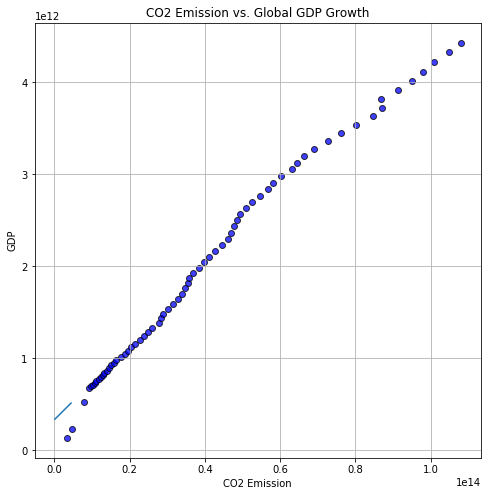

<Figure size 432x288 with 0 Axes>

In [17]:
# Creating a scatter plot and formatting 
plt.figure(figsize=(8,8))
plt.scatter(GDP, CO2, marker="o", facecolors="blue", edgecolors="black", linewidths =1,
             alpha=0.75, label="GDPvsCO2")

plt.title("CO2 Emission vs. Global GDP Growth")
plt.xlabel("CO2 Emission")
plt.ylabel("GDP")


# Line plot
slope, intercept, r_value, p_value, std_err = linregress(GDP,CO2)
line = slope * CO2 + intercept

plt.plot(CO2, line)

plt.grid()
plt.show()
plt.savefig("../Images/CO2vsGDP.png")
plt.show()

In [16]:
linregress(GDP, CO2)


LinregressResult(slope=0.04063759437893776, intercept=333599675293.9133, rvalue=0.9934077866566898, pvalue=9.206380713869929e-65, stderr=0.0005728972428260713)

Observation

From the regression analysis, we see that from the year of 1900 to 2015, there is a strong positive correlation between GDP and CO2 emission(rvalue = 0.9). We can reject the null hypothesis because the p-value is smaller than 0.05 (pvalue = 9.20 e-65). We conclude that there is is correlation between GDP and CO2 Emission between the year of 1950 to 2016